In [1]:
!pip install pandas matplotlib seaborn numpy scipy


RTT Data:
   Iteration Verifier       RTT
0          1  server3  0.341268
1          1  server2  1.569809
2          2  server2  0.067794
3          2  server3  0.067066
4          3  server2  0.050146
5          3  server3  0.049638
6          4  server2  0.052415
7          4  server3  0.051630
8          5  server2  0.047955
9          5  server3  0.047295


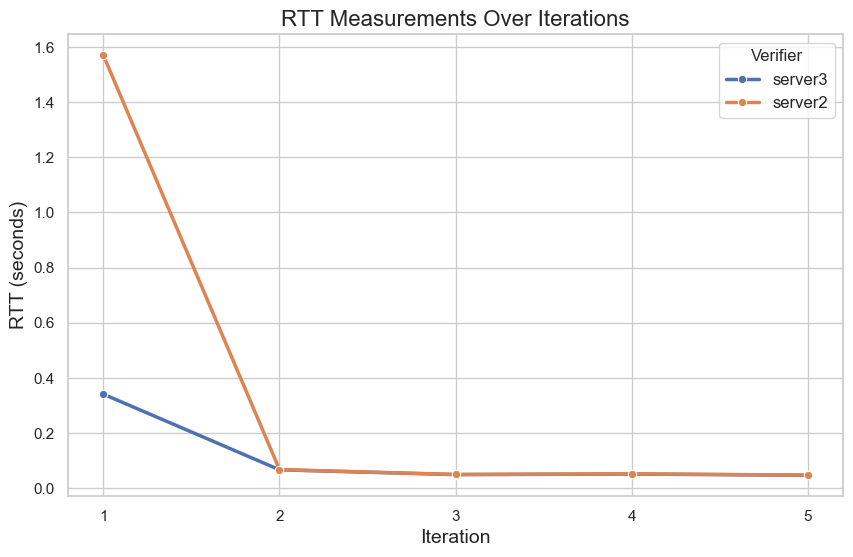


Fitted parameters for server3: a=4.775612, b=2.794111, c=0.049149


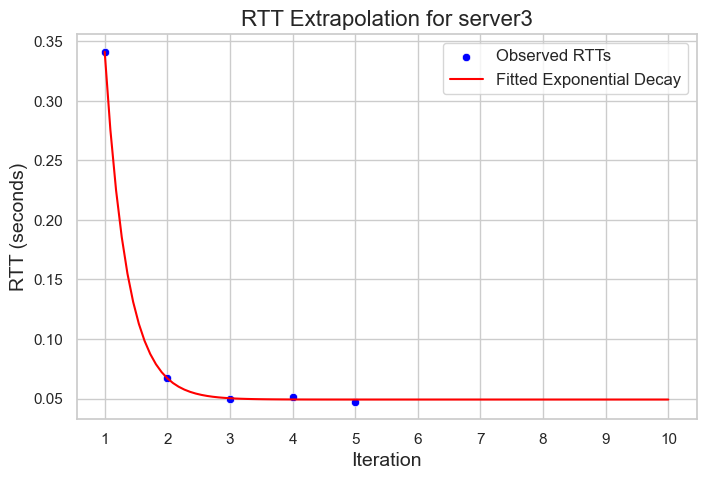


Fitted parameters for server2: a=130.572000, b=4.453408, c=0.050104


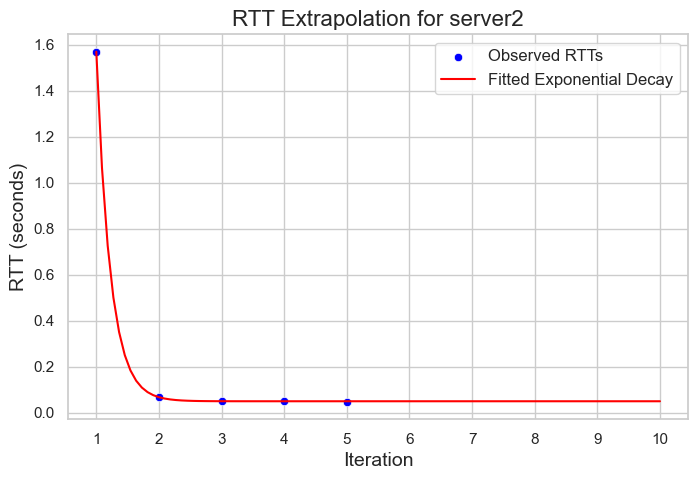


RTT Statistics:
          count      mean       std       min       25%       50%       75%  \
Verifier                                                                      
server2     5.0  0.357624  0.677677  0.047955  0.050146  0.052415  0.067794   
server3     5.0  0.111379  0.128745  0.047295  0.049638  0.051630  0.067066   

               max  
Verifier            
server2   1.569809  
server3   0.341268  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

# 1. Data Preparation

# RTT data as provided
rtt_data = [
    {"Iteration": 1, "Verifier": "server3", "RTT": 0.341268},
    {"Iteration": 1, "Verifier": "server2", "RTT": 1.569809},
    {"Iteration": 2, "Verifier": "server2", "RTT": 0.067794},
    {"Iteration": 2, "Verifier": "server3", "RTT": 0.067066},
    {"Iteration": 3, "Verifier": "server2", "RTT": 0.050146},
    {"Iteration": 3, "Verifier": "server3", "RTT": 0.049638},
    {"Iteration": 4, "Verifier": "server2", "RTT": 0.052415},
    {"Iteration": 4, "Verifier": "server3", "RTT": 0.051630},
    {"Iteration": 5, "Verifier": "server2", "RTT": 0.047955},
    {"Iteration": 5, "Verifier": "server3", "RTT": 0.047295},
]

# Convert data to pandas DataFrame
df = pd.DataFrame(rtt_data)

# Display the DataFrame
print("RTT Data:")
print(df)

# 2. Data Visualization

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a line plot for RTT vs Iteration for each verifier
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Iteration", y="RTT", hue="Verifier", marker="o", linewidth=2.5)

# Add titles and labels
plt.title("RTT Measurements Over Iterations", fontsize=16)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("RTT (seconds)", fontsize=14)
plt.legend(title="Verifier", fontsize=12, title_fontsize=12)
plt.xticks(df["Iteration"].unique())  # Ensure all iterations are shown

# Show the plot
plt.show()

# 3. Extrapolation (Prediction)

# Define an exponential decay function
def exponential_decay(x, a, b, c):
    """
    Exponential decay model.
    a: Initial value
    b: Rate of decay
    c: Offset
    """
    return a * np.exp(-b * x) + c

# Function to perform extrapolation for a given verifier
def extrapolate_rtt(verifier_df, verifier_name):
    """
    Fit an exponential decay model to the RTT data and predict future RTTs.
    
    Parameters:
    - verifier_df: DataFrame containing RTT data for the verifier
    - verifier_name: Name of the verifier (for labeling)
    
    Returns:
    - None (plots the data and the fitted curve)
    """
    # Sort the DataFrame by Iteration
    verifier_df = verifier_df.sort_values("Iteration")
    
    # Independent variable (Iteration)
    x_data = verifier_df["Iteration"].values
    # Dependent variable (RTT)
    y_data = verifier_df["RTT"].values
    
    # Initial guess for the parameters [a, b, c]
    initial_guess = [y_data[0], 1.0, 0.0]
    
    try:
        # Fit the exponential decay model to the data
        popt, pcov = curve_fit(exponential_decay, x_data, y_data, p0=initial_guess)
        a, b, c = popt
        print(f"\nFitted parameters for {verifier_name}: a={a:.6f}, b={b:.6f}, c={c:.6f}")
        
        # Generate x values for plotting the fitted curve
        x_fit = np.linspace(1, x_data[-1] + 5, 100)  # Extend 5 iterations ahead
        y_fit = exponential_decay(x_fit, *popt)
        
        # Plot the data and the fitted curve
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=x_data, y=y_data, label="Observed RTTs", color='blue')
        plt.plot(x_fit, y_fit, label="Fitted Exponential Decay", color='red')
        plt.title(f"RTT Extrapolation for {verifier_name}", fontsize=16)
        plt.xlabel("Iteration", fontsize=14)
        plt.ylabel("RTT (seconds)", fontsize=14)
        plt.legend(fontsize=12)
        plt.xticks(range(1, int(x_fit.max()) + 1))
        plt.show()
        
    except RuntimeError as e:
        print(f"Error fitting data for {verifier_name}: {e}")

# Extrapolate RTTs for each verifier
for verifier in df["Verifier"].unique():
    verifier_df = df[df["Verifier"] == verifier]
    extrapolate_rtt(verifier_df, verifier)

# 4. Summary of RTTs

# Calculate basic statistics for RTTs
print("\nRTT Statistics:")
print(df.groupby("Verifier")["RTT"].describe())
